In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import contextily as cx


Read forecasted housing price data. 

In [2]:
df = pd.read_csv('Data/dcfull.csv')
df.head(50)

,zipcode,date,median_listing_price,active_listing_count,netinflow,change_price,change_listing,change_inflow
0,20001,2018-01-01,730000.000000,81.0,-61.0,NaN,NaN,NaN
1,20001,2018-02-01,779000.000000,89.0,-138.0,NaN,NaN,NaN
2,20001,2018-03-01,729000.000000,103.0,-163.0,NaN,NaN,NaN
3,20001,2018-04-01,717000.000000,117.0,-94.0,NaN,NaN,NaN
4,20001,2018-05-01,754950.000000,125.0,-131.0,NaN,NaN,NaN
5,20001,2018-06-01,749000.000000,134.0,-213.0,NaN,NaN,NaN
6,20001,2018-07-01,749950.000000,121.0,-240.0,NaN,NaN,NaN
7,20001,2018-08-01,755000.000000,107.0,-56.0,NaN,NaN,NaN
8,20001,2018-09-01,750000.000000,135.0,-100.0,NaN,NaN,NaN
9,20001,2018-10-01,749499.500000,167.0,-60.0,NaN,NaN,NaN


Read US zip codes shape file. 

In [3]:
usa = gpd.read_file("Shape/tl_2019_us_zcta510/tl_2019_us_zcta510.shp")
usa['zipcode'] = usa.ZCTA5CE10.astype('int')
usa.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,zipcode
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327...",43451
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537...",43452
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...",43456
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253...",43457
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532...",43458


Read US county shape file. 

In [4]:
county = gpd.read_file("Shape/US_County_Boundaries/US_County_Boundaries.shp")

county.CTFIPS = county.CTFIPS.astype('int')


Read Geo Data to merge across zipcode and county. 

In [5]:
# Read Geo Data 
df_g = pd.read_csv('Data/df_geo.csv')
# Include only Washington DC metro area 
cz = df_g[['countyname', 'countyfips', 'ZIP', 'stateabbrev']][df_g.czname=='Washington DC']
# Adjust columns names and data type 
cz.rename(columns={'ZIP':'zipcode', 'countyfips':'CTFIPS'}, inplace=True)
cz.CTFIPS = cz.CTFIPS.astype('int')

Merge county shape file to geo data and drop coounties outside of Wasington DC Metro Area. 

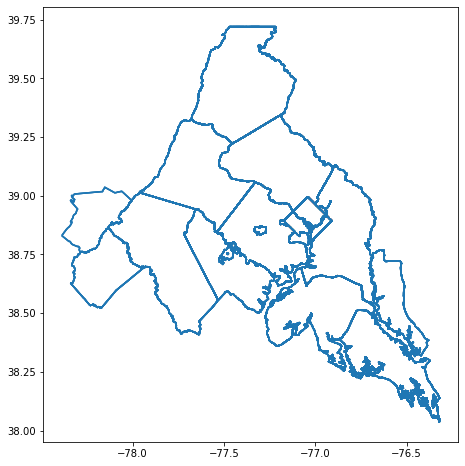

In [6]:
map_county = county.merge(cz, on = 'CTFIPS', how='inner')
map_county.boundary.plot(figsize=(8, 8));

The above figure plots the counties included as Washington DC metropolitan area. 

Next, I merge us zipcode shapes to Geo data and drop outside of Washington DC metro area. 

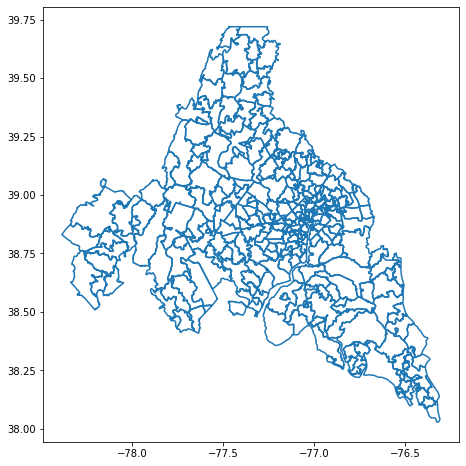

In [7]:
map_cz = usa.merge(cz, on='zipcode', how='inner')
map_cz.boundary.plot(figsize=(8, 8));

The above figrue maps the zipcodes included in the study. 

I colored the zip code by states; yellow = Mariland, red = Washington DC, and gray = Virgirnia. 

<AxesSubplot:>

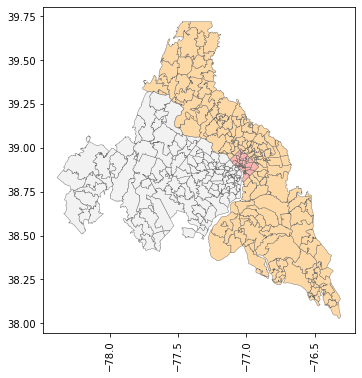

In [8]:
# Assign number for three states to show different color on the map 
map_cz['state_n'] =1
map_cz.loc[map_cz['stateabbrev'] == 'MD', 'state_n'] = 2
map_cz.loc[map_cz['stateabbrev'] == 'VA', 'state_n'] = 3

fig, ax = plt.subplots(1, figsize=(6, 6))
plt.xticks(rotation=90)
map_cz.plot(column="state_n", cmap='Pastel1' , linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})


In a similar way, I colored counties by states. 

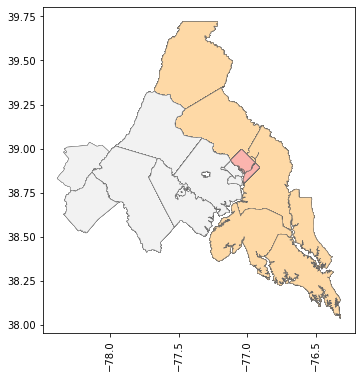

In [9]:
map_county
# Assign number for three states to show different color on the map 
map_county['state_n'] =1
map_county.loc[map_county['stateabbrev'] == 'MD', 'state_n'] = 2
map_county.loc[map_county['stateabbrev'] == 'VA', 'state_n'] = 3

# Plot county map colored by states 
fig, ax = plt.subplots(1, figsize=(6, 6))
plt.xticks(rotation=90)
map_county.plot(column="state_n", cmap='Pastel1' , linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'});


Merge map_cz (zip code shape file) with df (housing price forecast data), and I start plotting my forcast in the map.

In [10]:
map_zip = map_cz.merge(df, on='zipcode', how ='left')

## Create geo plot by monthly ( yearly) average data !!

In [11]:
df['year']=df.date.astype(str).str[:4]

In [12]:
df_year= df.groupby(['zipcode', 'year']).mean()

df_year.reset_index(inplace=True)

#df_month.to_csv('df_month.csv', index=True)
#df_year= df_month[df_month.date!='index']

In [13]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               935 non-null    int64  
 1   year                  935 non-null    object 
 2   median_listing_price  935 non-null    float64
 3   active_listing_count  935 non-null    float64
 4   netinflow             935 non-null    float64
 5   change_price          744 non-null    float64
 6   change_listing        744 non-null    float64
 7   change_inflow         741 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 58.6+ KB


In [14]:
df_year

,zipcode,year,median_listing_price,active_listing_count,netinflow,change_price,change_listing,change_inflow
0,20001,2018,748983.250000,121.083333,-125.250000,NaN,NaN,NaN
1,20001,2019,776978.458333,116.916667,-152.833333,0.037639,-0.015013,0.504855
2,20001,2020,750324.916667,158.000000,-302.916667,-0.033308,0.327298,1.189394
3,20001,2021,717662.500000,175.750000,-167.750000,-0.040660,0.202624,-0.377489
4,20001,2022,734489.892526,176.761422,-224.834359,0.024822,0.016119,0.444214
...,...,...,...,...,...,...,...,...
930,22642,2022,424346.190700,12.871831,17.299380,0.148393,0.589032,-2.057047
931,22712,2018,369338.333333,30.833333,0.666667,NaN,NaN,NaN
932,22712,2019,373896.130952,34.083333,-2.083333,0.013921,0.111844,0.135958
933,22712,2020,378136.250000,17.583333,0.750000,0.013153,-0.450745,-inf


In [15]:
# Merge with county map shape file 
df_map_year = map_cz.merge(df_year, on='zipcode', how ='right')
df_map_year

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,...,CTFIPS,stateabbrev,state_n,year,median_listing_price,active_listing_count,netinflow,change_price,change_listing,change_inflow
0,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,11001,DC,1,2018,748983.250000,121.083333,-125.250000,NaN,NaN,NaN
1,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,11001,DC,1,2019,776978.458333,116.916667,-152.833333,0.037639,-0.015013,0.504855
2,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,11001,DC,1,2020,750324.916667,158.000000,-302.916667,-0.033308,0.327298,1.189394
3,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,11001,DC,1,2021,717662.500000,175.750000,-167.750000,-0.040660,0.202624,-0.377489
4,20001,20001,B5,G6350,S,5655798,159593,+38.9103532,-077.0177386,"POLYGON ((-77.02829 38.91192, -77.02814 38.912...",...,11001,DC,1,2022,734489.892526,176.761422,-224.834359,0.024822,0.016119,0.444214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,22642,22642,B5,G6350,S,132304432,493862,+38.9468965,-078.0121380,"MULTIPOLYGON (((-78.03469 38.95132, -78.03466 ...",...,51187,VA,3,2022,424346.190700,12.871831,17.299380,0.148393,0.589032,-2.057047
931,22712,22712,B5,G6350,S,93845411,506012,+38.5640083,-077.7572465,"POLYGON ((-77.84552 38.58945, -77.84429 38.588...",...,51061,VA,3,2018,369338.333333,30.833333,0.666667,NaN,NaN,NaN
932,22712,22712,B5,G6350,S,93845411,506012,+38.5640083,-077.7572465,"POLYGON ((-77.84552 38.58945, -77.84429 38.588...",...,51061,VA,3,2019,373896.130952,34.083333,-2.083333,0.013921,0.111844,0.135958
933,22712,22712,B5,G6350,S,93845411,506012,+38.5640083,-077.7572465,"POLYGON ((-77.84552 38.58945, -77.84429 38.588...",...,51061,VA,3,2020,378136.250000,17.583333,0.750000,0.013153,-0.450745,-inf


Next, I plot the marchant changes for (2022Dec, 2021Dec, 2020Dec, 2020Jan). 2022Dec and 2021Dec are model forecast. 

In [16]:
df19 = df_map_year[df_map_year.year=='2019']
df20 = df_map_year[df_map_year.year=='2020']
df21 = df_map_year[df_map_year.year=='2021']
df22 = df_map_year[df_map_year.year=='2022']

## Price Annual Average

In [17]:
# To keep uniform color scale across figrues 
vmin=df_map_year.median_listing_price.min()
vmax=df_map_year.median_listing_price.max()

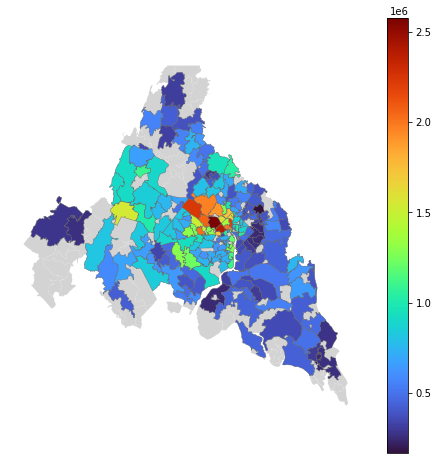

In [18]:
# 2019 December housing price (pre-covid)

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19.plot(column="median_listing_price", cmap="turbo", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})
#plt.title('Housing price in 2019 December')

bar_info = plt.cm.ScalarMappable(cmap="turbo", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");

Zoom in the map 

Plot 2020 December map. 

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

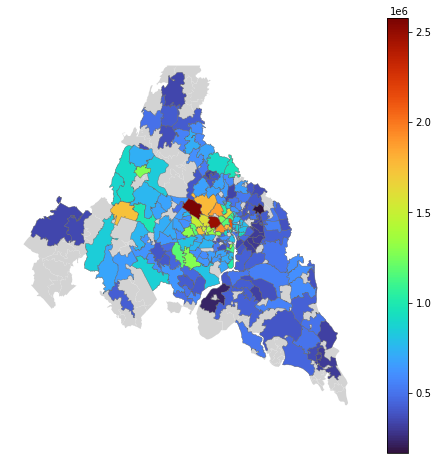

In [19]:

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20.plot(column="median_listing_price", cmap="turbo", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="turbo", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

Plot December 2021 housing price 

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

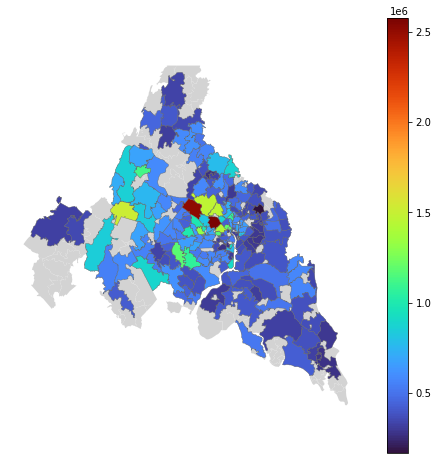

In [20]:


fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df21.plot(column="median_listing_price", cmap="turbo", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="turbo", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")


Plot forecasting price (December 2022)

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

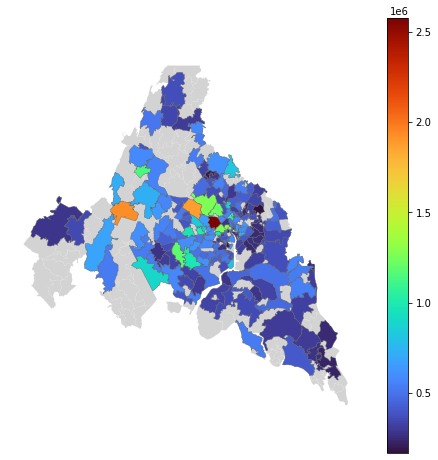

In [21]:


fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22.plot(column="median_listing_price", cmap="turbo", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="turbo", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")


## yoy change of lisitng price  

## Price Change Annual Average 

In [22]:
# To keep uniform color scale across figrues 
vmin=df_map_year.change_price.min()
vmax=df_map_year.change_price.max()

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

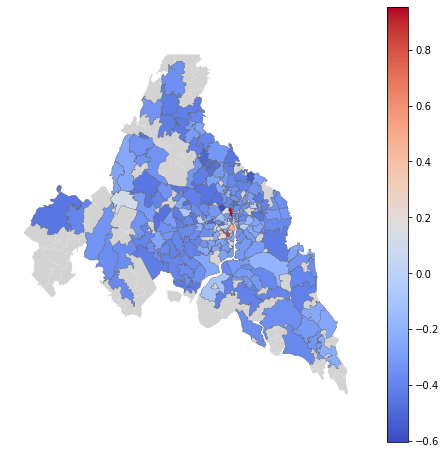

In [23]:
# Data frame which exlcude the zip code 20008. To see the better price change map. THis zipcode jumped price almost 4 times in a year 2019. 

# 2019 data 

#df19dec_1= df19dec[df19dec.zipcode!=20008]

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df19.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

# for zoom in
#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")



(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

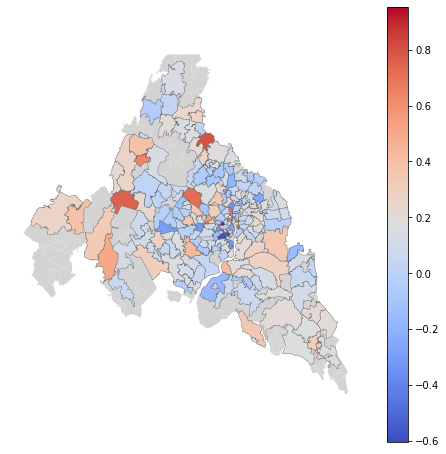

In [24]:
# 20 December 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df20.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

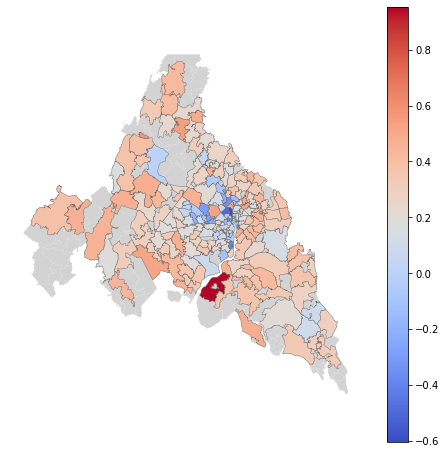

In [25]:
# 21 December 

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
df21.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

(-78.49064974999999, -76.20496525, 37.9441023, 39.80461369999999)

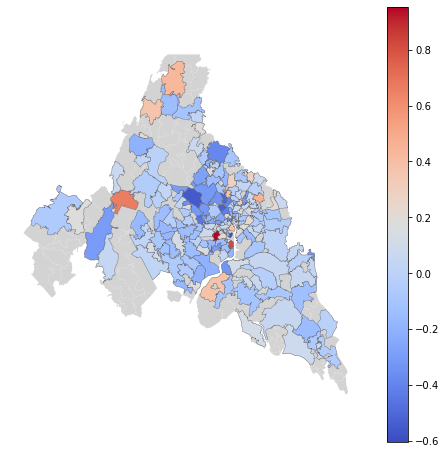

In [26]:
# 22 forecast 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')

df22.plot(column="change_price", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

## Top 10 zipcode in terms of price changes in 2022

In [27]:
top10 = df22.sort_values('change_price', ascending=False).head(20)

In [28]:
save = top10[['zipcode', 'CTFIPS', 'stateabbrev', 'change_price', 'median_listing_price', 'active_listing_count', 'netinflow']]

save.to_csv('Data/top10_22.csv')

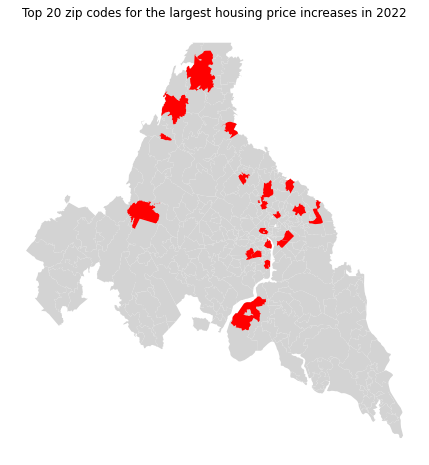

In [53]:
#map_cz = usa.merge(cz, on='zipcode', how='inner')
#map_cz.boundary.plot(figsize=(8, 8));

fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2022')
ax.axis("off");

In [30]:
top10_re = pd.read_csv('Data/top10_22_re.csv')
top10_re = map_cz.merge(top10_re, on='zipcode', how ='inner')

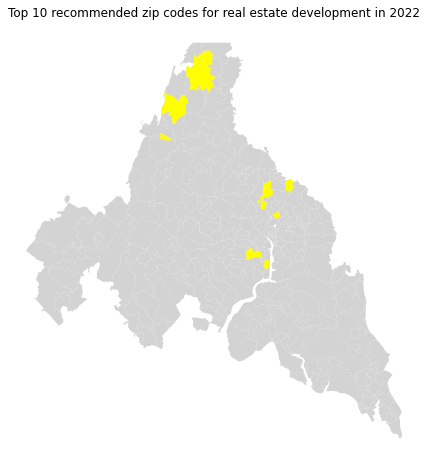

In [54]:

fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10_re[top10_re.flag1==1].plot(ax=ax, color='yellow')
ax.set_title('Top 10 recommended zip codes for real estate development in 2022')
ax.axis("off");

# TOp20 for 2019

In [32]:
top10_19 = df19.sort_values('change_price', ascending=False).head(20)

In [33]:
top10_19[['zipcode', 'CTFIPS', 'stateabbrev', 'change_price', 'median_listing_price', 'active_listing_count', 'netinflow']]

,zipcode,CTFIPS,stateabbrev,change_price,median_listing_price,active_listing_count,netinflow
26,20008,11001,DC,0.953301,1.547226e+06,78.000000,-56.000000
868,22302,51510,VA,0.892810,7.240571e+05,19.833333,-6.583333
828,22202,51013,VA,0.624244,8.844012e+05,12.833333,-46.500000
878,22304,51510,VA,0.460870,5.159167e+05,45.333333,-88.166667
129,20117,51107,VA,0.357934,1.106500e+06,37.500000,-3.750000
56,20016,11001,DC,0.355021,9.934363e+05,85.500000,-19.583333
888,22307,51059,VA,0.342922,8.292737e+05,26.500000,-4.750000
729,22041,51059,VA,0.336201,4.459887e+05,19.666667,-39.583333
873,22303,51059,VA,0.319473,5.049872e+05,22.833333,-21.666667
838,22204,51013,VA,0.317601,5.738847e+05,30.333333,-59.833333


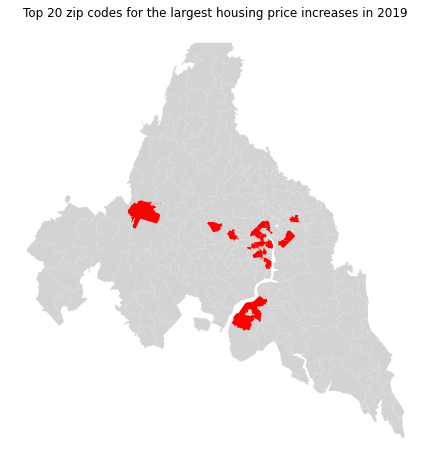

In [55]:
fig, ax = plt.subplots(figsize = (8,8))
map_cz.to_crs(epsg=4326).plot(ax=ax, color='lightgray')
top10_19.plot(ax=ax, color='red')
ax.set_title('Top 20 zip codes for the largest housing price increases in 2019')
ax.axis("off");

## Plot Net Inflow 

In [35]:
# To keep uniform color scale across figrues 
vmin=df_map_year.netinflow.min()
vmax=df_map_year.netinflow.max()

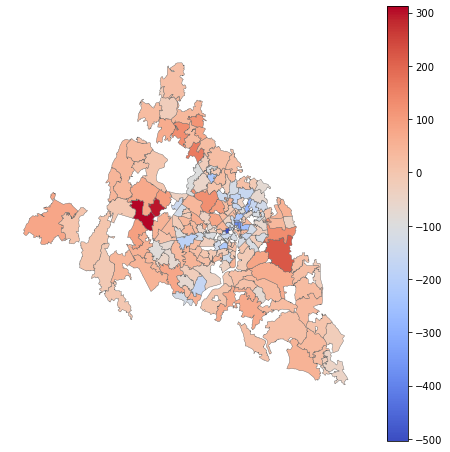

In [36]:
# 2019 December housing price (pre-covid)

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df19.plot(column="netinflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})
#plt.title('Housing price in 2019 December')

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.axis("off");

Zoom in the map 

(-77.5, -76.9, 38.8, 39.2)

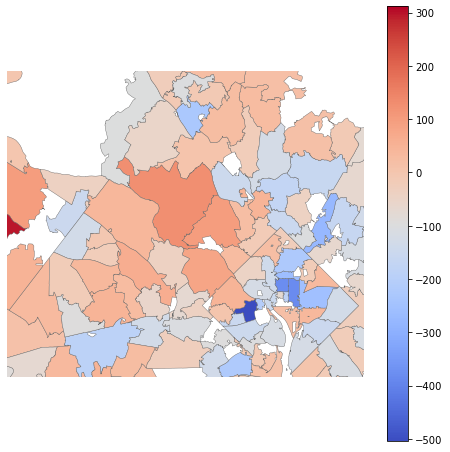

In [37]:
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df19.plot(column="netinflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

ax.set_xlim(-77.50, -76.90)
ax.set_ylim(38.8, 39.2)
ax.axis("off")

Plot 2020 December map. 

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

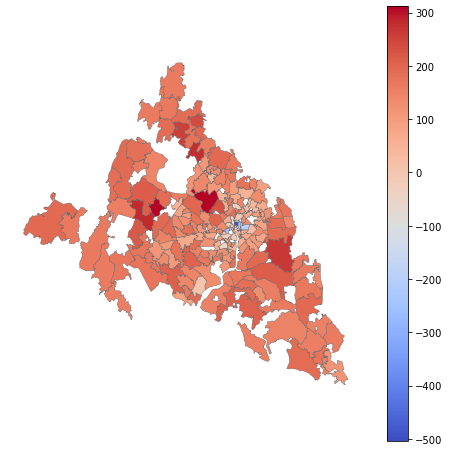

In [38]:

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df20.plot(column="netinflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

Plot December 2021 housing price 

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

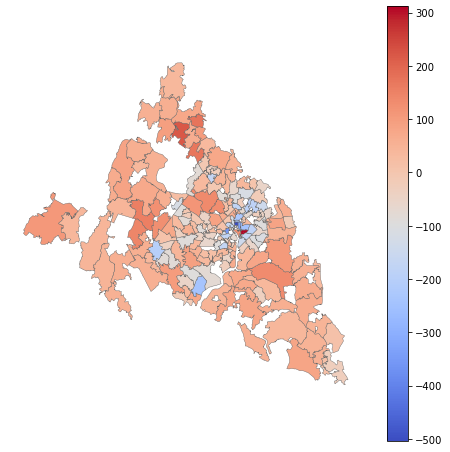

In [39]:


fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df21.plot(column="netinflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")


Plot forecasting price (December 2022)

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

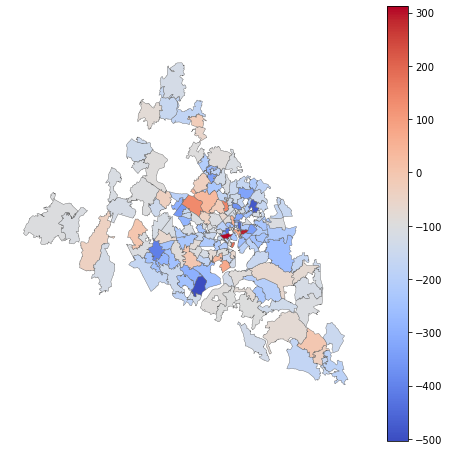

In [40]:


fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df22.plot(column="netinflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")


## yoy change of net inflow 

In [41]:
df19.change_inflow

1      0.504855
6     -5.372349
11    -0.311949
16     1.030310
21    -0.513147
         ...   
913        -inf
917   -0.073150
922    0.096928
927   -1.184791
932    0.135958
Name: change_inflow, Length: 191, dtype: float64

In [42]:
# To keep uniform color scale across figrues 
vmin=df_map_year.change_inflow.min()
vmax=df_map_year.change_inflow.max()

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

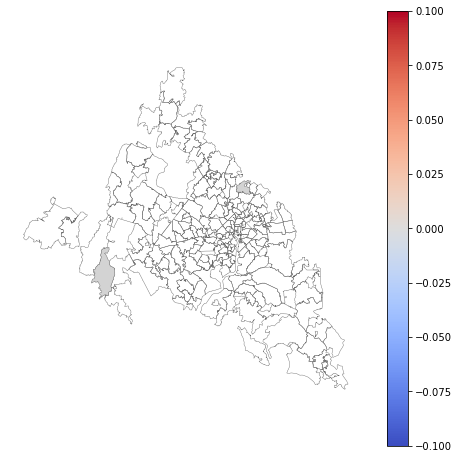

In [43]:
# Data frame which exlcude the zip code 20008. To see the better price change map. THis zipcode jumped price almost 4 times in a year 2019. 

# 2019 data 

#df19dec_1= df19dec[df19dec.zipcode!=20008]

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df19.plot(column="change_inflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

# for zoom in
#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")



(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

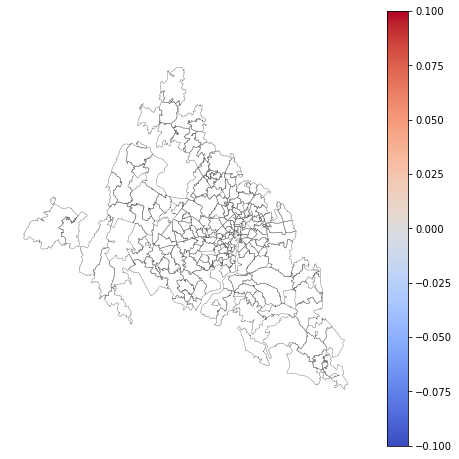

In [44]:
# 20 December 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df20.plot(column="change_inflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

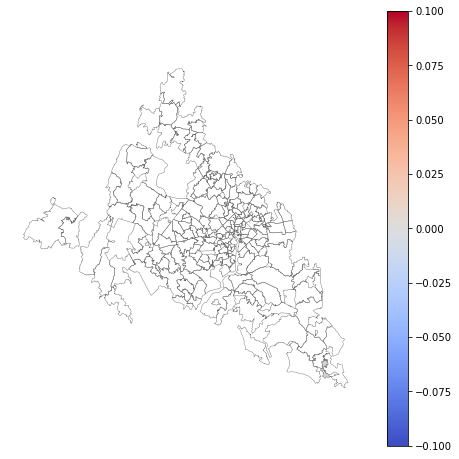

In [45]:
# 21 December 

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df21.plot(column="change_inflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4", missing_kwds={'color': 'lightgrey'})

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

(-78.43905799999999, -76.254194, 38.0764499, 39.76270809999999)

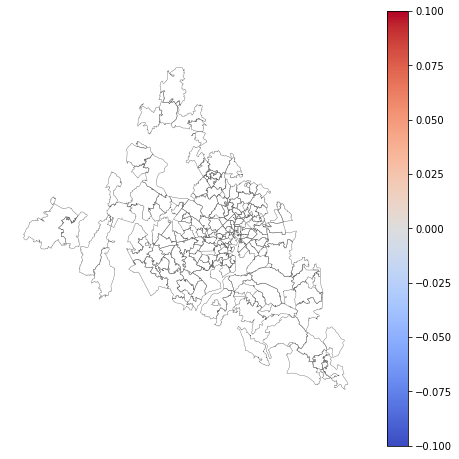

In [46]:
# 22 forecast 
fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)
df22.plot(column="change_inflow", cmap="coolwarm", linewidth=0.4, ax=ax, edgecolor=".4")

bar_info = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
bar_info._A = []
cbar = fig.colorbar(bar_info)

#ax.set_xlim(-78.00, -76.95)
#ax.set_ylim(38.5, 39.45)
ax.axis("off")

Next plot price changes